In [2]:
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import tarfile
from IPython.display import display, Image
from scipy import ndimage, misc
from sklearn.linear_model import LogisticRegression
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle

In [60]:
print((len(image_files) * image_size * image_size * 3)/1024/1024)

9833


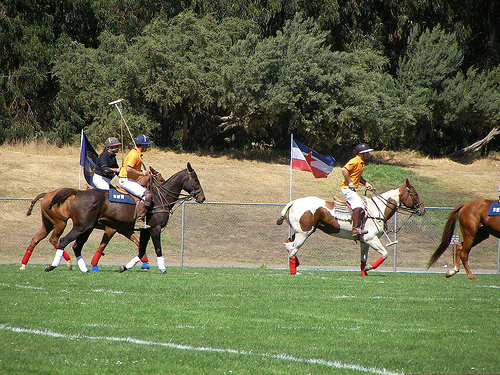

In [104]:
imagepath = 'voc/VOCdevkit/VOC2012/JPEGImages/'
image_files = os.listdir(imagepath)
for image in image_files[19:20]:
    display(Image(filename=imagepath + image))



In [18]:
image_size = 448
pixel_depth = 255

train_file_paths = open("voc/2012_train.txt")
dataset_size = 5717
i=0
dataset = np.ndarray(shape=(dataset_size, image_size, image_size, 3),
                     dtype=np.float32)
for image_path in train_file_paths:
    try:
        image_path = image_path.strip()
        img_raw = misc.imresize(ndimage.imread(image_path), (image_size, 
                                                             image_size))
        image_data = (img_raw.astype(float) - 
                        pixel_depth / 2) / pixel_depth
        dataset[i, :, :, :] = image_data
        i+=1
        if(i%500 == 0):
            print(i)
    except IOError as e:
        print('Could not read:', image_path, ':', e, '- it\'s ok, skipping.')
        break

print('Done!')



100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
Done!


In [61]:

classes = ["aeroplane", "bicycle", "bird", "boat", "bottle", "bus", "car", "cat", "chair", "cow", "diningtable", "dog", "horse", "motorbike", "person", "pottedplant", "sheep", "sofa", "train", "tvmonitor"]

dataset_size = 5717
i=0
labels = np.ndarray(shape=(dataset_size, 27, 5),
                     dtype=np.float32)

#label everything with -1 for invalid. There are 27 slots per item because that's the max in the dataset
labels.fill(-1)


train_file_paths = open("voc/2012_train.txt")

max_count = 0
file_count = 0
for image_path in train_file_paths:
    
    try:
        image_path = image_path.strip()
        label_file_name = image_path[-15:-4]
        label_file = open("voc/VOCdevkit/VOC2012/labels/"
                          +label_file_name+".txt")
        count = 0
        for line in label_file:
            labels[i,count,:] = line.split()
            count+=1
        i += 1
        file_count += 1
    except IOError as e:
        print('Could not read:', image_path, ':', e, '- it\'s ok, skipping.')
        break

print(labels[6])



[[  1.           0.32300001   0.048        0.16599999   0.09066667]
 [  1.           0.38999999   0.212        0.31200001   0.22133334]
 [ 14.           0.60100001   0.41466665   0.37799999   0.43466666]
 [  3.           0.52399999   0.25333333   0.95200002   0.49599999]
 [  3.           0.50099999   0.62533331   0.99800003   0.25333333]
 [ -1.          -1.          -1.          -1.          -1.        ]
 [ -1.          -1.          -1.          -1.          -1.        ]
 [ -1.          -1.          -1.          -1.          -1.        ]
 [ -1.          -1.          -1.          -1.          -1.        ]
 [ -1.          -1.          -1.          -1.          -1.        ]
 [ -1.          -1.          -1.          -1.          -1.        ]
 [ -1.          -1.          -1.          -1.          -1.        ]
 [ -1.          -1.          -1.          -1.          -1.        ]
 [ -1.          -1.          -1.          -1.          -1.        ]
 [ -1.          -1.          -1.          -1.   

In [47]:
classes = ["aeroplane", "bicycle", "bird", "boat", "bottle", "bus", "car", "cat", "chair", "cow", "diningtable", "dog", "horse", "motorbike", "person", "pottedplant", "sheep", "sofa", "train", "tvmonitor"]


labelpath = 'voc/VOCdevkit/VOC2012/labels/'


dog
dog
dog
person


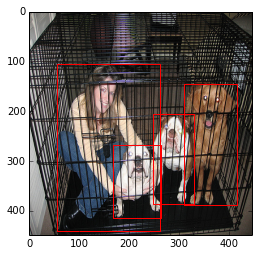

In [117]:
%matplotlib inline
from matplotlib import pyplot
import matplotlib as mpl
from matplotlib.patches import Rectangle


index = 1220


pyplot.imshow(dataset[index,:,:,:] + 0.5)

for box in labels[index]:
    if(box[0] < 0):
        break; #end of classes for this img
    print(classes[int(box[0])])
    ca = plt.gca()
    ca.add_patch(Rectangle((box[1]*image_size - box[3]*image_size*0.5 
                            ,box[2]*image_size - box[4]*image_size*0.5 )
        , box[3]*image_size, box[4]*image_size, ec="red", fill=False))
pyplot.show()
